# REF3: CSE575- Project 2: K Means Clustering

STUDENT: Francis Mendoza

ASUID: 1213055998

EMAIL: fmendoz7@asu.edu

---------------------------------------------------------------------------------------------
#### STRATEGY 1: Randomly picking initial centers


#### STRATEGY 2: First Center Random, Then Maximum Equidistance
    1. k lists for k centroids 
    2. Basically, find the largest distnace from the initial point, pick that as your centroid
    3. Continue to populate 

#### IMPORTANT POINTS
    1. Clusters need to work from 2-10
    2. Plot Objective Function value vs. Number Of Clusters, k
    3. Plot Objective Function TWICE under EACH STRATEGY (each start under different 
    initialization,  to smooth out any discrepancies from the first run)
    
#### (!!!) NEED TO PLOT THE LOSS VS K

In [65]:
import scipy.io
import numpy as np
import random # for alternative approach for #1
import matplotlib.pyplot as plt, mpld3
from matplotlib import style

style.use('ggplot')

In [66]:
Numpyfile = scipy.io.loadmat('AllSamples.mat')

# Return as numpy array
coordinatesArr = Numpyfile['AllSamples']
#coordinatesArr

### STRATEGY 1 IMPLEMENTATION

In [67]:
class K_Means1:
    # Constructor
    def __init__(self, k =3, tolerance = 0.0001, max_iterations = 500):
        self.k = k
        self.tolerance = tolerance
        self.max_iterations = max_iterations
#-----------------------------------------------------------------------------------------------------------------    
    # Distance Metric we use
    def Euclidean_distance(feat_one, feat_two):
        squared_distance = 0
        
        # Lengths of two features must be the same
        for i in range(len(feat_one)):
            squared_distance += (feat_one[i] - feat_two[i])**2
        
        ed = sqrt(squared_distance)
        return ed;
    
    # Global Boolean Values To Switch Strategy 1 and Strategy 2
    strat1Bool = False
    strat2Bool = False
#-----------------------------------------------------------------------------------------------------------------    
    # (!!!) STRATEGY 1: Initialize Centroids Randomly
    def centroidInit_Strat1(self, coordinatesArr):
        self.centroids = {}
        self.objectivelst = []
        self.flatList = []
        
        #(!!!)
        self.objectiveDict = {}
        
        yValueObjective = 0
        
        # YUZHEN'S METHOD: STEP 1, Randomize Initial Centroids
        for i in range(self.k):
            # Taking first k centroids is a valid way to randomize?
            self.centroids[i] = coordinatesArr[i]
            
        """# RANDOMNESS LIBRARY METHOD: STEP 1, Alternative Way to Randomize Initial Centroids, using Python Randomness Library
        for i in range(self.k):
            self.centroids[i] = random.choice(coordinatesArr)"""
            
        # STEP 2: Begin Iterations
        for i in range(self.max_iterations):
            
            # Dictionary to store points depending on {classification: coordinates}
            self.classes = {}
            
            #(!!!) localSum to sum all the values 
            localSum = 0 
            
            # Initialize Null Dictionary for classes and objective dictionary values
            for i in range(self.k):
                self.classes[i] = []
                self.objectiveDict[i] = []
            
            # STEP 3: Calculate Euclidean Distance Between Point And Cluster
            for points in coordinatesArr: 
                # 'points' have (x, y) form, calculate distance with respect to EACH centroid
                distances = [np.linalg.norm(points - self.centroids[centroid]) for centroid in self.centroids]
                
                # Take the MINIMUM of the distance of EVERY SINGLE POINT respective to that node
                classification = distances.index(min(distances))
                self.classes[classification].append(points)

            previous = dict(self.centroids)

            # STEP 4: Recalcualte Centroids For Next Run
            for classification in self.classes:
                self.centroids[classification] = np.average(self.classes[classification], axis = 0)
                
            isOptimal = True
            
            # STEP 5: Break Out Of Main Loop If Results Are Optimal
            for centroid in self.centroids:
                original_centroid = previous[centroid]
                curr = self.centroids[centroid]
                
                if np.sum((curr - original_centroid)/original_centroid * 100.00) > self.tolerance:
                    isOptimal = False
                    
            if isOptimal == True:
                break
                
        # STEP 6: Plot Objective Function For Each k
        totalSum = 0
        
        # Iterate through every class 
        for classification in self.classes:
            
            # (!!!) Calculate distance for all points within that classification, sum them up into one value
            temp = [np.linalg.norm(points - self.centroids[centroid]) for centroid in self.centroids]
            localSum = sum(temp)
            
            # Add localSum to totalSum
            totalSum += localSum
            
            # Append totalSum (objective value of k including all those before it)
            self.objectiveDict[classification].append(totalSum)
            
        self.objectivelst = list(self.objectiveDict.values()) 
        
        for sublist in self.objectivelst:
            for item in sublist:
                self.flatList.append(item)
                
        #print("SHAPE OF CLASSES: ", len(self.classes))
        #print("SHAPE OF FLATLIST: ", len(self.flatList))
        print("SUCCESSIVE OBJECTIVE VALUES: ", self.flatList)
        
        print("//////////////////////////////////////////////////")
#-----------------------------------------------------------------------------------------------------------------
    def pred(self, coordinatesArr):
        distances = [np.linalg.norm(coordinatesArr - self.centroids[centroid] for centroid in self.centroids)]
        classification = distances.index(min(distances))
        return classification
#-----------------------------------------------------------------------------------------------------------------

In [68]:
# HELPER METHOD: Execute Strategy No.1 Exclusively
def strategy1_execute(X1, a):
    # STRATEGY 1, For Loop To Iterate from 2-10 Clusters, 2 runs for the whole thing
    for i in range(2,11):
        print("Initialization #", a)
        print("STRATEGY # 1: Clusters = ", i)
        
        # (!!!) K Means 1 and Strat 1
        km = K_Means1(i)
        km.centroidInit_Strat1(X1)
        
        # GRAPH: Objective Function per y starts here
        # You need 1 because you NEED to start out with the initial point before second cluster
        locX = np.arange(1, 11, 1)
        
        for iter in range(len(km.flatList)):
            plt.scatter(locX[iter], km.flatList[iter], s = 130, marker = "x")
            
        plt.xlabel("S1: Number Of Clusters, K")
        plt.ylabel("S1: Objective Function Value")
        plt.show()
        #------------------------------------------------------------------------------------------
        # GRAPH: Scatterplot starts here
        colors = 10*["darkorange", "deeppink", "springgreen", "r", "g", "c", "b", "k", "m", "y"]

        for centroid in km.centroids:
            plt.scatter(km.centroids[centroid][0], km.centroids[centroid][1], s = 130, marker = "x")

        for classification in km.classes:
            color = colors[classification]
            for xCoordinate, yCoordinate in km.classes[classification]:
                plt.scatter(xCoordinate, yCoordinate, color = color, s = 30)
        plt.xlabel("S1: X")
        plt.ylabel("S1: Y")
        plt.show()
        print("-------------------------------------------------------------------")

### STRATEGY 2 IMPLEMENTATION

In [69]:
class K_Means2:
    # Constructor
    def __init__(self, k =3, tolerance = 0.0001, max_iterations = 500):
        self.k = k
        self.tolerance = tolerance
        self.max_iterations = max_iterations
#-----------------------------------------------------------------------------------------------------------------    
    # Distance Metric we use
    def Euclidean_distance(feat_one, feat_two):
        squared_distance = 0
        
        # Lengths of two features must be the same
        for i in range(len(feat_one)):
            squared_distance += (feat_one[i] - feat_two[i])**2
        
        ed = sqrt(squared_distance)
        return ed;
    
    # Global Boolean Values To Switch Strategy 1 and Strategy 2
    strat1Bool = False
    strat2Bool = False
#-----------------------------------------------------------------------------------------------------------------    
    # (!!!) STRATEGY 2: Space Out Centroids
    def centroidInit_Strat2(self, coordinatesArr):
        self.centroids = {}
        self.objectivelst = []
        self.flatList = []
        
        #(!!!)
        self.objectiveDict = {}
        
        yValueObjective = 0
        
        #----------------------------------------------------------------------------------------
        # STEP 1: Randomize Initial Centroid, Calculate Subsequent Centroids
        """ YOUR CODE HERE """
        
        # (!!!) NEED TO ITERATE RESPECTIVE TO SELF.K to properly loop through amount of centroids
        
        # YUZHEN'S METHOD: Pick the first centroid from dataset
        firstCentroid = coordinatesArr[0]
        self.centroids[0] = firstCentroid
        
        """# RANDOMNESS LIBRARY METHOD: Alternative Way to Randomize Initial Centroids, using Python Randomness Library
        self.centroids[0] = random.choice(coordinatesArr)"""
            
        for z in range(self.k):
            
            centroidCounter = 0
            masterAvgDict = {}
            
            # This just calculates the distance of ONE point to EVERY CENTROID IN THE LIST
                # You need to do that for ALL of the points within coordinatesArr
            for points in coordinatesArr: 
                # clustDist is a "Mini-Array" respective to ONE POINT
                clustDist = [np.linalg.norm(points - self.centroids[centroid]) for centroid in self.centroids]

                # STEP 1B: Take the AVERAGE of ALL THE VALUES within miniarray clustDist
                pointAverageDist = np.average(clustDist)                

                # STEP 1C: Append that to a master dictionary
                masterAvgDict[centroidCounter] = pointAverageDist
                centroidCounter += 1

            # STEP 1D: Within this given iteration, PICK THE MAXIMUM VALUE as your NEXT CENTROID
            # Retrieve key of maximum average value from masterAvgDict (holds average distance of all points to all current centroids)
            candidateCentroidKey = max(masterAvgDict, key=masterAvgDict.get)
            self.centroids[z] = coordinatesArr[candidateCentroidKey]
        #----------------------------------------------------------------------------------------
        # STEP 2: Begin Iterations
        for i in range(self.max_iterations):
            
            # Dictionary to store points depending on {classification: coordinates}
            self.classes = {}
            
            #(!!!) localSum to sum all the values 
            localSum = 0 
            
            # Initialize Null Dictionary for classes and objective dictionary values
            for i in range(self.k):
                self.classes[i] = []
                self.objectiveDict[i] = []
            
            # STEP 3: Calculate Euclidean Distance Between Point And Cluster
            for points in coordinatesArr: 
                # 'points' have (x, y) form, calculate distance with respect to EACH centroid
                distances = [np.linalg.norm(points - self.centroids[centroid]) for centroid in self.centroids]
                
                # Take the MINIMUM of the distance of EVERY SINGLE POINT respective to that node
                classification = distances.index(min(distances))
                self.classes[classification].append(points)

            previous = dict(self.centroids)

            # STEP 4: Recalcualte Centroids For Next Run
            for classification in self.classes:
                self.centroids[classification] = np.average(self.classes[classification], axis = 0)
                
            isOptimal = True
            
            # STEP 5: Break Out Of Main Loop If Results Are Optimal
            for centroid in self.centroids:
                original_centroid = previous[centroid]
                curr = self.centroids[centroid]
                
                if np.sum((curr - original_centroid)/original_centroid * 100.00) > self.tolerance:
                    isOptimal = False
                    
            if isOptimal == True:
                break
#--------------------------------------------------------------------------------------------------------------------
        # STEP 6: Plot Objective Function For Each k
        totalSum = 0
        
        # Iterate through every class 
        for classification in self.classes:
            
            # (!!!) Calculate distance for all points within that classification, sum them up into one value
            latestIndex = len(self.centroids) - 1
            latestCentroid = self.centroids[latestIndex]
            
            temp = [np.linalg.norm(points - self.centroids[latestIndex]) for points in coordinatesArr]
            localSum = sum(temp)
            
            # Add localSum to totalSum
            totalSum += localSum
            
            # Append totalSum (objective value of k including all those before it)
            self.objectiveDict[classification].append(totalSum)
            
        self.objectivelst = list(self.objectiveDict.values()) 
        
        for sublist in self.objectivelst:
            for item in sublist:
                self.flatList.append(item)
                print("ITEM APPENDED: ", item)
                
        print("SHAPE OF CLASSES: ", len(self.classes))
        print("SHAPE OF FLATLIST: ", len(self.flatList))
        print("SUCCESSIVE OBJECTIVE VALUES: ", self.flatList)
        
        print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")

In [70]:
# HELPER METHOD: Execute Strategy No.2 Exclusively
def strategy2_execute(X2, b):
    # STRATEGY 2, For Loop To Iterate from 2-10 Clusters, 2 runs for the whole thing
    for i in range(2,11):
        print("Initialization #", b)
        print("STRATEGY # 2: Clusters = ", i)
        
        # (!!!) K Means 2 and Strat 2
        km = K_Means2(i)
        km.centroidInit_Strat2(X2)
        
        # GRAPH: Objective Function per y starts here
        # You need 1 because you NEED to start out with the initial point before second cluster
        locX = np.arange(1, 11, 1)
        
        for iter in range(len(km.flatList)):
            plt.scatter(locX[iter], km.flatList[iter], s = 130, marker = "x")
            
        plt.xlabel("S2: Number Of Clusters, K")
        plt.ylabel("S2: Objective Function Value")
        plt.show()
        #------------------------------------------------------------------------------------------
        # GRAPH: Scatterplot starts here
        colors = 10*["darkorange", "deeppink", "springgreen", "r", "g", "c", "b", "k", "m", "y"]

        for centroid in km.centroids:
            print("TYPE OF km.centroids[centroid][0]: ", type(km.centroids[centroid][0]))
            print("TYPE OF km.centroids[centroid][1]: ", type(km.centroids[centroid][1]))
            plt.scatter(km.centroids[centroid][0], km.centroids[centroid][1], s = 130, marker = "x")

        for classification in km.classes:
            color = colors[classification]
            for xCoordinate, yCoordinate in km.classes[classification]:
                plt.scatter(xCoordinate, yCoordinate, color = color, s = 30)

        plt.show()
        print("-------------------------------------------------------------------")

Initialization # 1
STRATEGY # 2: Clusters =  2
ITEM APPENDED:  1124.41797617017
ITEM APPENDED:  2248.83595234034
SHAPE OF CLASSES:  2
SHAPE OF FLATLIST:  2
SUCCESSIVE OBJECTIVE VALUES:  [1124.41797617017, 2248.83595234034]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


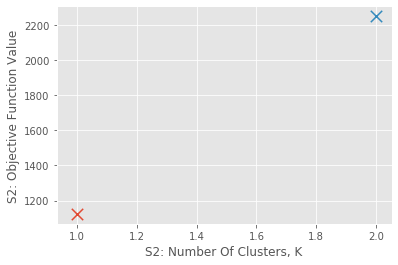

TYPE OF km.centroids[centroid][0]:  <class 'numpy.float64'>
TYPE OF km.centroids[centroid][1]:  <class 'numpy.float64'>
TYPE OF km.centroids[centroid][0]:  <class 'numpy.float64'>
TYPE OF km.centroids[centroid][1]:  <class 'numpy.float64'>


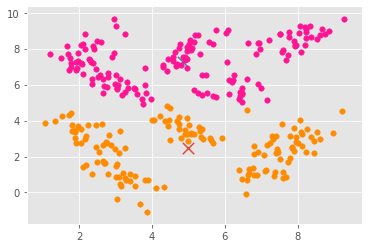

-------------------------------------------------------------------
Initialization # 1
STRATEGY # 2: Clusters =  3
ITEM APPENDED:  1403.7084349171646
ITEM APPENDED:  2807.416869834329
ITEM APPENDED:  4211.125304751494
SHAPE OF CLASSES:  3
SHAPE OF FLATLIST:  3
SUCCESSIVE OBJECTIVE VALUES:  [1403.7084349171646, 2807.416869834329, 4211.125304751494]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


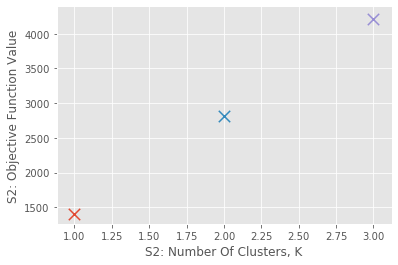

TYPE OF km.centroids[centroid][0]:  <class 'numpy.float64'>
TYPE OF km.centroids[centroid][1]:  <class 'numpy.float64'>
TYPE OF km.centroids[centroid][0]:  <class 'numpy.float64'>
TYPE OF km.centroids[centroid][1]:  <class 'numpy.float64'>
TYPE OF km.centroids[centroid][0]:  <class 'numpy.float64'>
TYPE OF km.centroids[centroid][1]:  <class 'numpy.float64'>


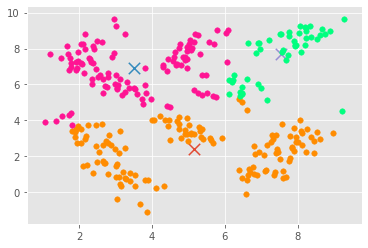

-------------------------------------------------------------------
Initialization # 1
STRATEGY # 2: Clusters =  4
ITEM APPENDED:  1368.2436722443006
ITEM APPENDED:  2736.487344488601
ITEM APPENDED:  4104.7310167329015
ITEM APPENDED:  5472.974688977202
SHAPE OF CLASSES:  4
SHAPE OF FLATLIST:  4
SUCCESSIVE OBJECTIVE VALUES:  [1368.2436722443006, 2736.487344488601, 4104.7310167329015, 5472.974688977202]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


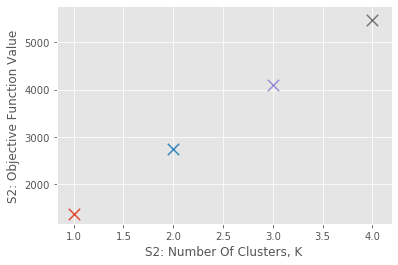

TYPE OF km.centroids[centroid][0]:  <class 'numpy.float64'>
TYPE OF km.centroids[centroid][1]:  <class 'numpy.float64'>
TYPE OF km.centroids[centroid][0]:  <class 'numpy.float64'>
TYPE OF km.centroids[centroid][1]:  <class 'numpy.float64'>
TYPE OF km.centroids[centroid][0]:  <class 'numpy.float64'>
TYPE OF km.centroids[centroid][1]:  <class 'numpy.float64'>
TYPE OF km.centroids[centroid][0]:  <class 'numpy.float64'>
TYPE OF km.centroids[centroid][1]:  <class 'numpy.float64'>


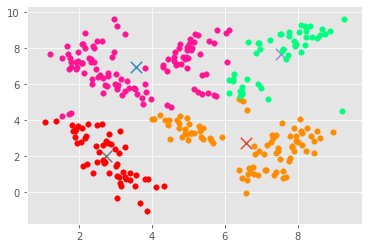

-------------------------------------------------------------------
Initialization # 1
STRATEGY # 2: Clusters =  5
ITEM APPENDED:  1233.6236471617908
ITEM APPENDED:  2467.2472943235816
ITEM APPENDED:  3700.8709414853724
ITEM APPENDED:  4934.494588647163
ITEM APPENDED:  6168.118235808954
SHAPE OF CLASSES:  5
SHAPE OF FLATLIST:  5
SUCCESSIVE OBJECTIVE VALUES:  [1233.6236471617908, 2467.2472943235816, 3700.8709414853724, 4934.494588647163, 6168.118235808954]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


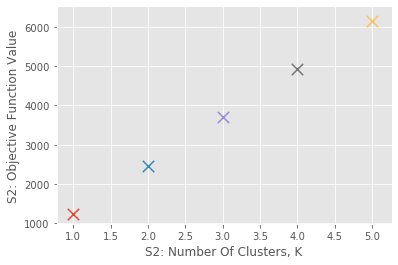

TYPE OF km.centroids[centroid][0]:  <class 'numpy.float64'>
TYPE OF km.centroids[centroid][1]:  <class 'numpy.float64'>
TYPE OF km.centroids[centroid][0]:  <class 'numpy.float64'>
TYPE OF km.centroids[centroid][1]:  <class 'numpy.float64'>
TYPE OF km.centroids[centroid][0]:  <class 'numpy.float64'>
TYPE OF km.centroids[centroid][1]:  <class 'numpy.float64'>
TYPE OF km.centroids[centroid][0]:  <class 'numpy.float64'>
TYPE OF km.centroids[centroid][1]:  <class 'numpy.float64'>
TYPE OF km.centroids[centroid][0]:  <class 'numpy.float64'>
TYPE OF km.centroids[centroid][1]:  <class 'numpy.float64'>


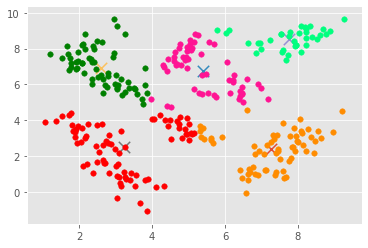

-------------------------------------------------------------------
Initialization # 1
STRATEGY # 2: Clusters =  6
ITEM APPENDED:  nan
ITEM APPENDED:  nan
ITEM APPENDED:  nan
ITEM APPENDED:  nan
ITEM APPENDED:  nan
ITEM APPENDED:  nan
SHAPE OF CLASSES:  6
SHAPE OF FLATLIST:  6
SUCCESSIVE OBJECTIVE VALUES:  [nan, nan, nan, nan, nan, nan]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


c:\users\franc\appdata\local\programs\python\python36\lib\site-packages\numpy\lib\function_base.py:393: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
c:\users\franc\appdata\local\programs\python\python36\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


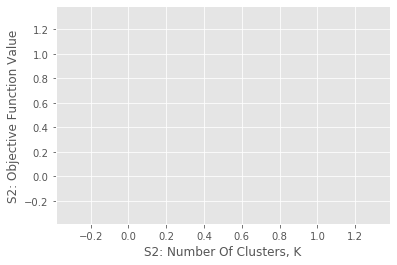

TYPE OF km.centroids[centroid][0]:  <class 'numpy.float64'>
TYPE OF km.centroids[centroid][1]:  <class 'numpy.float64'>
TYPE OF km.centroids[centroid][0]:  <class 'numpy.float64'>
TYPE OF km.centroids[centroid][1]:  <class 'numpy.float64'>
TYPE OF km.centroids[centroid][0]:  <class 'numpy.float64'>
TYPE OF km.centroids[centroid][1]:  <class 'numpy.float64'>
TYPE OF km.centroids[centroid][0]:  <class 'numpy.float64'>
TYPE OF km.centroids[centroid][1]:  <class 'numpy.float64'>
TYPE OF km.centroids[centroid][0]:  <class 'numpy.float64'>
TYPE OF km.centroids[centroid][1]:  <class 'numpy.float64'>


IndexError: invalid index to scalar variable.

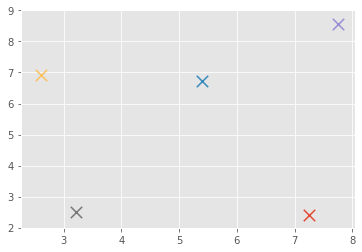

In [71]:
def main():
    X = coordinatesArr

    # STRATEGY 1, For Loop To Iterate from 2-10 Clusters, 2 runs for the whole thing
    """for a in range(1,3):
        strategy1_execute(X, a)
        print("===================================================================")"""
    
    # STRATEGY 2, For Loop To Iterate from 2-10 Clusters, 2 runs for the whole thing
    for b in range(1,3):
        strategy2_execute(X, b)
        print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")

if __name__ == "__main__":
    main()